# Is Cornell truly the most depressing school? A Cross-comparative Analysis of Positivity and Negativity Across Four Different Universities
#### Connie Liu (cl2264), solo project (no responsibility statement needed)

## 1. Introduction and hypothesis

When I first applied to college, it was a common sentiment that people didn't want to go to Cornell because it was "depressing" due to the fact it had a very large and competitive student body and extremely long winters. However, I wanted to examine with this project whether or not **Cornell was a depressing school compared to universities of similar profile** and if that was **affected by the factor of time (the season in particular)**. 

The universities I'm going to be comparing Cornell against are other Ivies that are active on Reddit and Berkeley. Although they aren't an Ivy, I specifically chose Berkeley because it is a similar large school with a very active Reddit that has a high amount of technology focus. In fact, because it's a large school I imagine its students face similar issues to Cornell such as feeling lost in a crowd of people. It would be a good way to see if Cornell was truly more depressing or not by comparing it against these high pressure schools.

This is an interesting and important question for many reasons. For one, the reputation of a college impacts whether people go there - people don't want to go to a school that is known to be cutthroat and sad. Another reason is that the state of college student's mental health is a very relevant topic for university wide decisions. Especially at Cornell where it’s broadly known for being depressing, it manifests in several ways. For example, the College of Engineering [cut down credit numbers](https://www.insidehighered.com/news/2022/03/22/cornell-engineering-cuts-credit-limit-save-mental-health) in order to uplift mental health, and there are numerous events aimed to promote it. Additionally, Cornell is even on some nationwide ["top stressed out universities"](https://thetab.com/us/2017/03/10/stressful-college-america-62478) lists. On campus, the stressed-out mentality is pervasive, discussed in several articles such as the [Cornell Daily Sun](https://cornellsun.com/2022/04/20/cornellians-reflect-on-the-pressures-of-college-life-as-another-academic-year-comes-to-a-close%EF%BF%BC/). There was even a widespread article about Cornell purposefully [avoided admitting students with mental health issues](https://www.salon.com/2021/12/19/depression-universities/).

However, I wanted to investigate – were Cornell students truly sadder and having a worse time compared to students at other universities – and if so – what factors, time or otherwise, affected students mental health?

My hypothesis was that Cornell’s mental health was no worse than other universities, as it could just be of the greater size that these issues are more common. I wanted to see that posts have been affected by factors such as the pandemic and the period the people are posting at. I had three specific predictions:
1. When looking at frequency and content of Reddit posts, the positivity and negativity of Cornell's students was not statistically different from other universities. I choose positivity and negativity sentiment as a litmus test for mental health because mental health has to do with how well you are feeling.
2. For the universities with discernable seasons, well-being took a dip in the winter time (from December to February) - for reasons such as [seasonable depression](https://health.cornell.edu/sites/health/files/pdf-library/winter-blues.pdf)
3. For months early in the pandemic (September, October 2021) there would more negativity than months later in the spring (April, May 2022).

## 2. Corpus, data, and methods

### Corpus and Data
The **corpus** I used was the Reddit contents from June 2021 to May 2022 and it was taken from all the active Ivy reddits (more than 1000 posts a month) + Berkeleys. I scraped them from each of the respective college reddits using INFO3350 Lecture 26 code as a basis but with **modifications** to account for the longer time range where I labeled the months, and also modifications to include the different subreddits. I also made sure to append extra meta data columns for subreddit and month as those were the buckets I'd be comparing univerisities by.

However the **limitation** of using Reddit data as representative of campus discourse is that there are other forums people could express their thoughts on from the campus newspaper, Twitter, and [Sidechat](https://sidechat.lol). However, in my opinion Reddit is the one that's most well-known for unfiltered thoughts from a diverse array of opinions. Also, the demographic of people that use Reddit is not comprehensive of every person at a university. However, there is no perfect corpus that evenly represents people at a university, so this is a constraint to be aware of before making broad generalizations with the data.

There was one main **omission** which was that I mostly only looked at four universities - Cornell, Columbia, UPenn, and Berkeley because those reddits all had a count over 1000 after testing with a one month dataset. The reason is that Reddits that have counts under 1000 might have different behaviors and normalizing it because under 1000 will probably make differences more pronounced. Another omission was that I only looked at the Reddit for this year. Because there had been so much flux in regards to campus COVID restrictions it would take much more analysis to understand all the fluctuations. In the future, with more processing power, it would be better to take data from a five year timespan.

In [ ]:
#Code to figure out the standard amount of posts and comments for one month
print(len(check_length()))

cornell 6164
BrownU 160
dartmouth 111
columbia 1240
yale 163
UPenn 1238
harvard 607
berkeley 9296
18979


### Preprocessing the Data
Below is the code for preprocessing the data from storing it in the pickled files to cleaning it. The code was referenced from lecture 26 but several **modifications** were made in relation to **adding an extra column for months**, **scraping more specific month and year combinations**, and **adding in extra universities and not scraping one subreddits**.

In [5]:
from datetime import datetime
import os
import glob
import pandas as pd
import random
from psaw import PushshiftAPI
# making the Reddit path
base_path = os.path.join('reddit_data')  
if not os.path.exists(base_path): 
    os.makedirs(base_path)     

In [ ]:
#Scrapes posts from a selected subreddit
""" Maria Antoniak's code with minor modifications """
def scrape_posts_from_subreddit(subreddit, api, year, month, end_date):
#    Takes the name of a subreddit, the PushshiftApi, a year and month to scrape from
    start_epoch = int(datetime(year, month, 1).timestamp())  # convert date into unicode timestamp
    end_epoch = int(datetime(year, month, end_date).timestamp())

    gen = api.search_submissions(after=start_epoch,
                                 before=end_epoch,
                                 subreddit=subreddit,
                                 filter=['url', 'author', 'created_utc',  # info we want about the post
                                         'title', 'subreddit', 'selftext',
                                         'num_comments', 'score', 'link_flair_text', 'id'])
    max_response_cache = 100000
    scraped_posts = []
    for _post in gen:
        scraped_posts.append(_post)
        if len(scraped_posts) >= max_response_cache:  # avoid requesting more posts than allowed
            break
    scraped_posts_df = pd.DataFrame([p.d_ for p in scraped_posts])
    return scraped_posts_df

In [ ]:
#Scrapes comments from a selected subreddit
""" Maria Antoniak's code with minor modifications """
def scrape_comments_from_subreddit(subreddit, api, year, month, end_date):
#     Takes the name of a subreddit, the PushshiftApi, a year and month to scrape from
    start_epoch = int(datetime(year, month, 1).timestamp())  # convert date into unicode timestamp
    end_epoch = int(datetime(year, month, end_date).timestamp())
    gen = api.search_comments(after=start_epoch,
                              before=end_epoch,
                              subreddit=subreddit,
                              filter=['author', 'body', 'created_utc', # info we want about the comment
                                      'id', 'link_id', 'parent_id',
                                      'reply_delay', 'score', 'subreddit'])
    max_response_cache = 100000
    scraped_comments = []
    for _comment in gen:
        scraped_comments.append(_comment)
        if len(scraped_comments) >= max_response_cache:  # avoid requesting more posts than allowed
            break
    scraped_comments_df = pd.DataFrame([p.d_ for p in scraped_comments])
    return scraped_comments_df

In [ ]:
#Scrapes subreddits from a list of subreddits
""" Maria Antoniak's code with minor modifications """
def scrape_subreddit(_target_subreddits, _target_types):
#     Takes a list of subreddits, a list of types of content to scrape, and a list of years to scrape from
    api = PushshiftAPI()
    print('Number of PushshiftApi shards that are not working:', api.metadata_.get('shards'))  # check if any Pushshift shards are down!
    for _subreddit in _target_subreddits:
        for _target_type in _target_types:
            months = [6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5]
            end_dates = [30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31]
            years = [2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022,2022, 2022, 2022]

            for _month, _end_date, _year in zip(months, end_dates, years):
                _output_directory_path = os.path.join(base_path, _subreddit, _target_type)  # directory to store scraped data
                                                                                            # by subreddit and type of content
                if not os.path.exists(_output_directory_path):  # if it does not exist
                    os.makedirs(_output_directory_path)         # create it!

                _file_name = _subreddit + '-' + str(_year) + '-' + str(_month) + '.pkl'  # filename of the csv with scraped data

                # scrape only if output file does not already exist
                if _file_name not in os.listdir(_output_directory_path):

                    print(str(datetime.now()) + ' ' + ': Scraping r/' + _subreddit + ' ' + str(_year) + '-' + str(_month) + '...')

                    if _target_type == 'posts':
                        _posts_df = scrape_posts_from_subreddit(_subreddit, api, _year, _month, _end_date)
                        if not _posts_df.empty:
                            _posts_df.to_pickle(os.path.join(_output_directory_path, _file_name), protocol=4)

                    if _target_type == 'comments':
                        _comments_df = scrape_comments_from_subreddit(_subreddit, api, _year, _month, _end_date)
                        if not _comments_df.empty:
                            _comments_df.to_pickle(os.path.join(_output_directory_path, _file_name), protocol=4)

    print(str(datetime.now()) + ' ' + ': Done scraping!')

In [ ]:
target_subreddits = ['cornell', 'columbia', 'UPenn','berkeley']  # subreddits to scrape

In [ ]:
target_types = ['posts', 'comments']  # type of content to scrape
scrape_subreddit(target_subreddits, target_types)

Number of PushshiftApi shards that are not working: None
2022-05-17 01:35:02.564329 : Scraping r/cornell 2021-12...
2022-05-17 01:35:29.401344 : Scraping r/cornell 2021-12...
2022-05-17 01:38:39.206844 : Scraping r/columbia 2021-12...
2022-05-17 01:38:46.629971 : Scraping r/columbia 2021-12...
2022-05-17 01:39:40.245323 : Scraping r/UPenn 2021-12...
2022-05-17 01:39:47.067759 : Scraping r/UPenn 2021-12...
2022-05-17 01:40:21.964290 : Scraping r/berkeley 2021-12...
2022-05-17 01:40:43.110267 : Scraping r/berkeley 2021-12...
2022-05-17 01:42:57.850330 : Done scraping!


The next chunks of code focus on combining the different pickled data into one comprehensive data frame. I again made modifications to save columns for months and subreddits.

In [ ]:
def combine_one_subreddit(_subreddit):  # creating csv with all of a subreddit's posts and comments
    df_d = {'author': [], 'id': [], 'type': [], 'text': [],   # create a dictionary
            'url': [], 'link_id': [], 'parent_id': [],
            'subreddit': [], 'created_utc': []}
    subreddit_pkl_path = os.path.join('reddit_data', _subreddit, f'{_subreddit}.pkl') # file with all the data
    if not os.path.exists(subreddit_pkl_path):  # if file does not exist
        for target_type in ['posts', 'comments']:
            files_directory_path = os.path.join('reddit_data', _subreddit, target_type)  # directory where scraped data is depending on subreddit and type of content
            all_target_type_files = glob.glob(os.path.join(files_directory_path, "*.pkl"))  # select all appropriate pickle files
            for f in all_target_type_files:  # we read each pickle file and include the info we want in the dictionary
                df = pd.read_pickle(f)
                if target_type == 'posts':
                    for index, row in df.iterrows():
                        df_d['author'].append(row['author'])
                        df_d['id'].append(f"{row['subreddit']}_{row['id']}_post")  # id of the post, 'Endo_xyz123_post'
                        df_d['type'].append('post')
                        df_d['text'].append(row['selftext'])  # textual content of the post
                        df_d['url'].append(row['url'])  # url of the post
                        df_d['link_id'].append('N/A')
                        df_d['parent_id'].append('N/A')
                        df_d['subreddit'].append(row['subreddit'])
                        df_d['created_utc'].append(row['created_utc'])  # utc time stamp of the post
                elif target_type == 'comments':
                    for index, row in df.iterrows():
                        df_d['author'].append(row['author'])
                        df_d['id'].append(f"{row['subreddit']}_{row['id']}_comment")
                        df_d['type'].append('comment')
                        df_d['text'].append(row['body'])  # textual content of the comment
                        df_d['url'].append(f"http://www.reddit.com/r/{row['subreddit']}/comments/{row['link_id'].split('_')[1]}/")  # url of the post
                        df_d['link_id'].append(row['link_id'])
                        df_d['parent_id'].append(row['parent_id'])
                        df_d['subreddit'].append(row['subreddit'])
                        df_d['created_utc'].append(row['created_utc'])  # utc time stamp of the post
        subreddit_df = pd.DataFrame.from_dict(df_d)  # create pandas dataframe from dictionary
        subreddit_df.sort_values('created_utc', inplace=True, ignore_index=True)  # order dataframe by date of post
        subreddit_df['time'] = pd.to_datetime(subreddit_df['created_utc'], unit='s').apply(lambda x: x.to_datetime64())  # convert timestamp to date
        subreddit_df['date'] = subreddit_df['time'].apply(lambda x: str(x).split(' ')[0])
        subreddit_df['month'] = subreddit_df['time'].apply(lambda x: str(x).split('-')[1])
        subreddit_df['year'] = subreddit_df['time'].apply(lambda x: str(x).split('-')[0])
        subreddit_df.drop(columns=['time'])
        subreddit_df.to_pickle(subreddit_pkl_path, protocol=4)  # saving it to pickle format

Below the code takes all the different pickled data from each month and combines it into one dataframe. I had to modify this code to add more information on the different months into another column for the dataframe.

In [ ]:
# make a df merge
for subreddit in target_subreddits:
    combine_one_subreddit(subreddit)

### Cleaning the Data
This step is based on the Reddit data scraping lecture as mentioned previously. The reason I found it essential to clean the data is because it was such a large size and if there was nonessential points that would artificially inflate results (especially if a user was spamming posts) it was important to remove it. The main difference is that I wanted to still save the month and subreddit it was from. Here the data saves it as a JSON which I had to [specifically process later in the code](https://stackoverflow.com/questions/44287011/valueerror-expected-object-or-value-when-reading-json-as-pandas-dataframe).

In [ ]:
import json
import little_mallet_wrapper as lmw
import Levenshtein
def find_duplicates(_df):  # function to find duplicated posts in the data
    prev_doc = ''
    map_dict = {}  # dict of authors' posts
    duplicate_indexes = []  # list of duplicates' indexes for removal from dataframe
    for index, row in _df.iterrows():  # iterate over posts
        author = row['author']
        doc = row['text']
        # if author info is available we compare each post with previous ones by the same author
        # we compare/calculate the similarity between the posts using the Levenshtein distance
        if author != '[deleted]':
            if author in map_dict.keys():
                flag = 0
                idx = 0
                while idx < len(map_dict[author]) and flag == 0:
                    lev = Levenshtein.ratio(doc, map_dict[author][idx])
                    if lev > 0.999:
                        duplicate_indexes.append(index)
                        flag = 1
                    idx += 1
                if flag == 0:
                    map_dict[author].append(doc)
            else:
                map_dict[author] = [doc]
        # if author info is not available we compare each post with the preceding one chronologically
        else:
            lev = Levenshtein.ratio(row['text'], prev_doc)
            if lev > 0.95:
                duplicate_indexes.append(index)
        prev_doc = doc
    return duplicate_indexes

In [ ]:
for college in active_colleges:
    dupes = find_duplicates(college)  # find duplicates
    college.drop(dupes, inplace=True, axis=0)  # removing duplicates
    print(f'Number of duplicates: {len(dupes)}')

Number of duplicates: 5743
Number of duplicates: 993
Number of duplicates: 980
Number of duplicates: 7120


In [ ]:
def cleaning_docs(raw_df, _subreddit):
    '''
    Takes the full corpus, a file path. It cleans all the documents (removes punctuation and stopwords). It saves the clean corpus in a json file
    '''
    clean_docs_file = os.path.join('reddit_data', _subreddit, f'clean_{_subreddit}.pkl')
    if not os.path.exists(clean_docs_file): 
        
        clean_d = {'id':[], 'clean':[], 'og':[], 'year':[], 'date':[], 'month':[], 'subreddit':[]}

        for index, row in raw_df.iterrows():                               # iterating over posts and comments
            if 'bot' not in row['author'] and 'Bot' not in row['author']:  # if author is not a bot
                clean_doc_st = lmw.process_string(row['text'])             # cleaning documents
                clean_doc_l = [t for t in clean_doc_st.split(' ')]
                if len(set(clean_doc_l))>5 and 'bot' not in clean_doc_l:  # exclude posts that have less than 5 different words
                                                                          # or that contain word 'bot'
                    clean_d['clean'].append(clean_doc_l)
                    clean_d['id'].append(row['id'])
                    clean_d['og'].append(row['text'])
                    clean_d['year'].append(row['year'])
                    clean_d['date'].append(row['date'])
                    clean_d['month'].append(row['month'])
                    clean_d['subreddit'].append(row['subreddit'])

        with open(clean_docs_file, 'w') as jsonfile:  # creating a file with the dict of documents to topic model
            json.dump(clean_d, jsonfile)

In [ ]:
%%time
for college in college_label:
    cleaning_docs(college[0], college[1])

CPU times: user 1min 45s, sys: 5.39 s, total: 1min 50s
Wall time: 2min 11s


#### Compiling the Data
Here we have a step to compile the data all into one data frame. As a result I wanted to preserve the raw uncleaned data so I made a separate total variable for that called rtotal, but I mainly relied on the clean total data which was stored in total. For this I had to specifically figure out how to read a pickled JSON file. This was different from lecture because they did not utilize cleaned documents for anything beyond topic modeling.

In [58]:
import json
# clean total file
def create_cleantotal():
    total = pd.DataFrame()
    for _subreddit in target_subreddits:
        clean_docs_file = os.path.join('reddit_data', _subreddit, f'clean_{_subreddit}.pkl')
        df = pd.read_json(clean_docs_file)
        df = df.dropna()
        total = pd.concat([total, df],axis=0)
    return total

In [ ]:
# normal total file
def create_total():
    total = pd.DataFrame()
    for _subreddit in target_subreddits:
        docs_file = os.path.join('reddit_data', _subreddit, f'{_subreddit}.pkl')
        df = pd.read_pickle(docs_file)
        df = df.dropna()
        total = pd.concat([total, df],axis=0)
    return total

In [ ]:
rtotal = create_total()

In [43]:
total_file = os.path.join('reddit_data','total','total.pkl')
total = pd.read_pickle(total_file)

Afterwards I took a copy of each college's data and made each into a dataframe.

In [44]:
df_cornell = total.loc[total['subreddit'] == "Cornell"].copy()
df_columbia = total.loc[total['subreddit'] == "columbia"].copy()
df_penn = total.loc[total['subreddit'] == "UPenn"].copy()
df_berkeley = total.loc[total['subreddit'] == "berkeley"].copy()
active_colleges = [df_cornell, df_columbia, df_penn, df_berkeley]
print(f'Number of posts in r/Cornell:', len(df_cornell))
print(f'Number of posts in r/Columbia:', len(df_columbia))
print(f'Number of posts in r/UPenn:', len(df_penn))
print(f'Number of posts in r/Berkeley:', len(df_berkeley))

Number of posts in r/Cornell: 95274
Number of posts in r/Columbia: 24994
Number of posts in r/UPenn: 20664
Number of posts in r/Berkeley: 110039


In [48]:
import re
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

## Methods - Analysis
### Part One: Finding 20 most common words
For this part, I wanted to find the 20 most common words, however this required some iteration on the stopwords itself, as many universities shared university related words such as "study". The reason I was looking at common words as the first method was that it would make any unique and niche topics to each school very obvious from the beginning, helping provide more detail as to what made each Reddit unique. However the main limitation was that it was a naive form of analysis, but it was good with setting the scene before going into more complex methods.

I specifically created most_common to take in several variables, more specifically the number of top words to find (and if none it would count all the words). In this code, the count vectorizer saves all the words and stores them in words_freq which I later used to make a new data frame with word and frequency.

In [49]:
from sklearn.feature_extraction import text
import random
def most_common(df, _type, my_stop_words, number):
    if _type != 'corpus':
        vectorizer = CountVectorizer(        
            input = 'content',               
            encoding = 'utf-8',
            strip_accents = 'unicode',
            lowercase = True
        )
        X = vectorizer.fit_transform(sampletexts)
        print(f"Total vectorized words in the corpus of {_type}:", X.sum())
        print(f"Average vectorized {_type} length:", int(X.sum()/X.shape[0]), "tokens")
    else:
        vectorizer = CountVectorizer(
            input = 'content',
            encoding = 'utf-8',
            strip_accents = 'unicode',
            lowercase = True,
            stop_words = my_stop_words          # remove stopwords
        )
        texts = df['og'].astype('string').tolist()
        X = vectorizer.fit_transform(texts)
        sum_words = X.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
        data=[]
        for word, freq in words_freq[:number]:
            data.append([word, freq])
        freq_df = pd.DataFrame(data, columns = ['Word', 'Freq'])
        return freq_df

Because these words didn't reveal that much, I iterated two times on one dataset's words to try and remove as many generic stopwords as possible. The reason I wanted to find the most common words was that this would give a good basis of the content of each university's Reddits and could later clue in to why there might be differences if any.

In [ ]:
# test1 - default
stop_words1 = 'english'
print(most_common(df_berkeley, 'corpus', stop_words1))

        Word  Frequency
0   berkeley       1351
1       just       1316
2       like       1118
3        don        978
4     people        904
5      think        730
6      class        705
7       know        705
8       time        591
9    classes        572
10     https        556
11    really        547
12      good        514
13      want        513
14        ve        485
15      need        480
16  semester        466
17    school        452
18       amp        449
19        cs        443
20     major        432
21      post        417
22      make        405
23       got        395
24        ll        392
25      math        386
26  students        384
27       com        372
28      year        357
29       way        354


In [ ]:
# test2 - removing some generic words
stop_words2 = text.ENGLISH_STOP_WORDS.union(["way", "year","just", "like", "people","classes","know","think","really","major","time","school","want","ve","https","amp","cal","got","year","ll","lot","need","going","make","campus", "semester","school"])
print(most_common(df_berkeley, 'corpus', stop_words2, 20))

         Word  Frequency
0    berkeley       1351
1         don        978
2       class        705
3        good        514
4          cs        443
5        post        417
6        math        386
7    students        384
8         com        372
9        sure        352
10        did        334
11        say        319
12       feel        313
13     summer        305
14    student        305
15     taking        304
16     reddit        299
17  questions        279
18      final        278
19       does        276
20     better        270
21        lol        267
22     course        264
23    housing        255
24       didn        254
25      right        250
26       help        250
27       work        248
28     pretty        248
29        new        244


In [51]:
stop_words3 = text.ENGLISH_STOP_WORDS.union(["probably","said","www","don","class","post","students","sure", "did", "say", "feel", "taking", "does", "lol", "course", "didn", "right","way", "year","just", "like", "people","classes","know","think","really","major","time","school","want","ve","https","amp","cal","got","year","ll","lot","need","going","make","campus", "semester","school"])

In [52]:
big_data = []
for college in active_colleges:
    big_data.append(most_common(college, 'corpus', stop_words3, 20))
topwords = pd.concat(big_data, keys = ['Cornell', 'Columbia', 'Penn', 'Berkeley'], axis=1)
print(topwords)

     Cornell           Columbia              Penn          Berkeley       
        Word   Freq        Word  Freq        Word  Freq        Word   Freq
0    cornell  18310    columbia  6814        penn  4905    berkeley  21838
1       good   7244     student  2549        good  1861          cs  10537
2      covid   5978        good  2357        work  1436        good  10205
3       work   5051        work  2012     student  1403     student   6729
4    student   4681      pretty  1447       upenn  1403        work   6713
5        day   4515  experience  1334     college  1184        math   6138
6        com   4499  university  1315      pretty  1133      pretty   5938
7     pretty   3941     college  1285      better  1036      better   5429
8     ithaca   3834      better  1273        math   971        help   5143
9     better   3814        help  1198         cis   953  experience   4944
10   getting   3768      thanks  1180        help   942     college   4913
11    person   3707     g

## Part Two: Sentiment Analysis
Initially I was going to do the statistics portion earlier and do VADER later but then I realized it would be a good way to see how the sentiment data as a whole changes throughout time and which schools were consistently different from each other in terms of trends, if any.

I decided to use [VADER](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/04-Sentiment-Analysis.html#how-vader-was-built-and-how-it-works) as a sentiment analysis tool because it's especially primed for social media textual analysis. For example, it can understand emoji usage and acronyms. Because Reddit is a social media website that means VADER would be equipped to understand that text the best. Furthermore, although there were more complex models out there I didn't have the bandwidth to connect to a GPU and focused on having the more feasible and effective method instead.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence):
# Create a SentimentIntensityAnalyzer object.
    sentAnalyzer = SentimentIntensityAnalyzer()
    sentiment_dict = sentAnalyzer.polarity_scores(sentence)
# Stores the sentiment in a dictionary as an object
    return sentiment_dict

#### Processing Data
Sentiment data processing took much longer than I thought, my first attempt to run all 200,000 or so posts and comments wouldn't finish after an hour of loading. In order to combat this since my computer could not handle several hours of continuous running, I changed the numbers around and did random subsampling. I made sure to do random sampling of [equal proportions](https://methods.sagepub.com/reference/encyc-of-research-design/n340.xml) to ensure that I took an equal percentage of each data source. The way I did this was I took the total amount of posts and comments in each data source and found what percentage of the whole each part was. Then, after that I multiplied that by 50,000 because the total number of entries was 250,000 so I wanted to do 1/5 of that.

In [ ]:
college_label_sent = [[df_cornell,"Cornell", 1542], [df_columbia,"Columbia", 415], [df_penn,"UPenn", 343], [df_berkeley,"Berkeley", 1792]]

When processing the data I chunked it into several different groups. Each month took about 10 to 15 minutes to run and I did it on Google Colab to prevent laptop overheating. I then pickled the data just in case I lost it as Colab recycles its runtime. However I forgot to save one pickle and as a result was unable to save that portion of the data for later reuse.

Afterwards I created a new dataframe for the data that was restructured to include the sentiment types as headers. The sentiment_scores function takes a list of sentences and outputs a dictionary of positive, neutral, negative, and compound.

In [ ]:
cmonth_list1=[6,7]
cmonth_list15=[8,9]
cmonth_list2=[10,11,12,1]
cmonth_list3=[2,3,4,5]

In [ ]:
def construct_line(month_list):
    labels = ['college','month','pos', 'neu','neg', 'compound']
    college_data=[]
    for college in college_label_sent:
        for month in month_list:
            data = college[0]['og'][college[0]["month"]==month]
            sample = random.sample(list(data), college[2])
            scores = sentiment_scores(sample)
            scores = list(scores.values())
            data=[college[1], month, scores[0], scores[1], scores[2], scores[3]]
            freq_df = pd.DataFrame(data, labels)
            college_data.append(freq_df)
    big_df = pd.concat(college_data, axis=1)
    return big_df.T

We also randomly sampled the list of data because it would take too long to load. Then we combined it into a big dataframe so it could be used as part of the line graph later on.

In [ ]:
line_df1=construct_line(cmonth_list15)
line_df2=construct_line(cmonth_list2)

In [ ]:
line_pkl_path = os.path.join('reddit_data','89.pkl')
line_df1.to_pickle(line_pkl_path, protocol=4)
line_pkl_path = os.path.join('reddit_data','1011121.pkl')
line_df2.to_pickle(line_pkl_path, protocol=4)
line_df67=pd.read_pickle(os.path.join("reddit_data","67.pkl"))
line_df3=construct_line(cmonth_list3)

In [ ]:
line_pkl_path = os.path.join('reddit_data','2345.pkl')
line_df3.to_pickle(line_pkl_path, protocol=4)

In [ ]:
lineparts = [line_df67, line_df1, line_df2, line_df3]
lineg_df = pd.concat(lineparts)
cline_df=[line_df67, line_df1, line_df2, line_df3]
fline_df=pd.concat(cline_df)

I then chose to plot the sentiment of the data over time rather than doing an aggregate for the whole year. The reason for this is because I wanted to create a visualization that would help me understand whether my hypothesis that time of year affected sentiment was supported. Pos means positive sentiment, neg means negative sentiment, neu means neutral sentiment, and compound is the overall sentiment score taking in all these factors.

**Although not shown the reason the compound graph is equal to one is because when the sample gets large enough it converges.** When I was testing to see if this was a bug or not, I tested with a smaller sample of 200 posts and saw that the compound ended up being one. I hypothesize this is because as posts increase the amount of strikingly positive and negative compared to neutral posts evens out so compound is not overwhelmingly positive or negative for the subreddit.

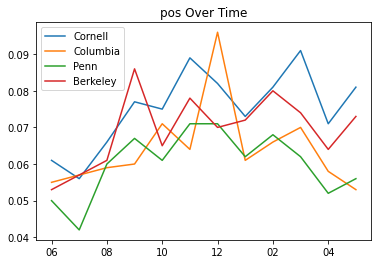

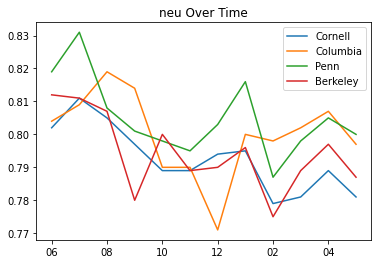

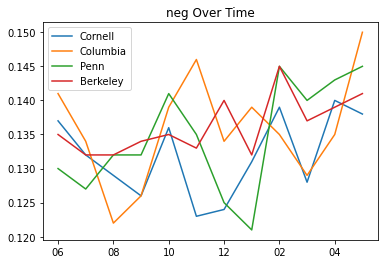

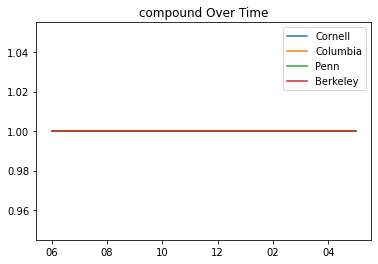

In [ ]:
analysis=["pos", "neu", "neg", 'compound']
for measure in analysis:
    linegraph = pd.DataFrame({
       'Cornell': list(fline_df.loc[fline_df.college=='Cornell', measure]),
       'Columbia': list(fline_df.loc[fline_df.college=='Columbia', measure]),
        'Penn': list(fline_df.loc[fline_df.college=='UPenn', measure]),
       'Berkeley': list(fline_df.loc[fline_df.college=='Berkeley', measure])
    }, index=['06', '07','08','09','10','11','12','01','02','03','04','05'])
    lines = linegraph.plot.line(title=(measure+" Over Time"))

## Part Three: Finding Frequency and Measuring Significance with Statistics
### Frequency Data Tables
Because the results between universities' top 20 words did not have the greatest differences and sentiment scoring was a bit of a black box because it took in a lot of data - I wanted to take a different approach to narrow down insights to specific feelings. I directly measured the frequency of different positive and negative words throughout the entire 12 month corpus. I made to normalize them against the standard length of a text post which would be 100 word length posts. That way it would show a number that was indicative of how much it would **show up per 100 words**.

In [13]:
def find_words(df, _type, my_stop_words):
    if _type != 'corpus':
        vectorizer = CountVectorizer(        # Token counts with stopwords
            input = 'content',               # input is a string of texts
            encoding = 'utf-8',
            strip_accents = 'unicode',
            lowercase = True
        )

        texts = df['text'].astype('string').tolist()
        X = vectorizer.fit_transform(texts)
        print(f"Total vectorized words in the corpus of {_type}:", X.sum())
        print(f"Average vectorized {_type} length:", int(X.sum()/X.shape[0]), "tokens")
    
    else:
        vectorizer = CountVectorizer(
            input = 'content',
            encoding = 'utf-8',
            strip_accents = 'unicode',
            lowercase = True,
            stop_words = my_stop_words          # remove stopwords
        )
        
        texts = df['text'].astype('string').tolist()
        X = vectorizer.fit_transform(texts)
        sum_words = X.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
        data=[]
        freq_df = pd.DataFrame(words_freq, columns = ['Word', 'Freq'])
        return freq_df

I picked four words per negative and positive sentiment to look deeper into. I picked words that typically would be used in a sentence for complaining or appreciating in order to avoid dual-meaning words and having to look into the nuance on how the word is used.

In [62]:
# Word definitions
sad_words = ["hard","worst", "sad","hate"]
happy_words = ["fun","best", "happy","love"]

In [79]:
def word_stats(target_counts):
    college_data=[]
    for college in active_colleges:
        data=[]
        normalize = 100/len(college)
        wordcount = (most_common(college, 'corpus', stop_words3, None))
        for word in target_counts:
            number = wordcount[wordcount["Word"]==word]["Freq"]
            data.append([word, int(number)*normalize])
            freq_df = pd.DataFrame(data, columns = ['Word', 'Freq'])
        college_data.append(freq_df)
    big_df = pd.concat(college_data, keys = ['Cornell', 'Columbia', 'Penn', 'Berkeley'], axis=1)
    return big_df
print("Negative Word Frequencies")
neg_wordfreq = word_stats(sad_words, 11)
display(neg_wordfreq)

Negative Word Frequencies


Cornell           Columbia             Penn           Berkeley          
     Word      Freq     Word      Freq   Word      Freq     Word      Freq
0    hard  2.912652     hard  3.972954   hard  3.711769     hard  4.051291
1   worst  0.573084    worst  0.748180  worst  0.561363    worst  0.580703
2     sad  0.516405      sad  0.376090    sad  0.246806      sad  0.476195
3    hate  0.756765     hate  0.576138   hate  0.677507     hate  0.760639

In [80]:
print("Positive Word Frequencies")
happy_wordfreq = word_stats(happy_words, 3)
display(happy_wordfreq)

Positive Word Frequencies


Cornell           Columbia             Penn           Berkeley          
     Word      Freq     Word      Freq   Word      Freq     Word      Freq
0     fun  1.403321      fun  1.444347    fun  1.645374      fun  1.784822
1    best  3.090035     best  4.044971   best  3.827913     best  3.897709
2   happy  0.965636    happy  1.072257  happy  1.282424    happy  0.944211
3    love  2.144342     love  2.588621   love  1.790554     love  2.309181

### Statistical tests
However, these numbers weren't enough if I wasn't sure if they were statistically different from each other. In order to understand the true statistical difference I partitioned the data into a new dataset where I found the frequency of each word for each month. If the numbers were consistent across months and they were significantly different, then I knew that there was a significant difference between them. Because I was comparing four different groups for each word, I decided to use an [ANOVA test](https://www.investopedia.com/terms/a/anova.asp) first between all the university subreddits as T-tests would only compare two directly with each other. Significance would be for p-values less than .05.
#### Anova Test Code

In [61]:
#Data that paired each dataframe with the label which was helpful in 
college_label= [[df_cornell,"Cornell"], [df_columbia,"Columbia"], [df_penn,"UPenn"], [df_berkeley,"Berkeley"]]

One of the biggest challenges working with the code was accounting for empty arrays in case the word didn't show up at all. Once I figured out how to address that edge case, I was able to find the most common words statistics for each month.

In [59]:
def word_stats2(target_counts, month):
    college_data=[]
    college_word=""
    base = ['College', 'Month']
    columns = base + target_counts
    for college in college_label:
        data=[college[1], month]
        normalize = 100/len(college[0])
        wordcount = (most_common(college[0][college[0]["month"]==month], 'corpus', stop_words3, None, None))
        for word in target_counts:
            number = wordcount[wordcount["Word"]==word]["Freq"]
            if (number.empty):
                data.append(0)
            else:
                data.append(int(number)*normalize)
        freq_df = pd.DataFrame(data, columns)
        college_data.append(freq_df)
    big_df = pd.concat(college_data, axis=1)
    return big_df.T

In [63]:
month_list=[6, 7, 8, 9, 10, 11, 12, 1, 2,3, 4, 5]
hmonth_data=[]
for month in month_list:
    stats1=word_stats2(happy_words, month)
    hmonth_data.append(stats1)
happy_final = pd.concat(hmonth_data, axis=0)

In [64]:
smonth_data=[]
for month in month_list:
    stats1=word_stats2(sad_words, month)
    smonth_data.append(stats1)
sad_final = pd.concat(smonth_data, axis=0)

In [55]:
import scipy
from scipy.stats import f_oneway
def print_anova(final, target_words):
    for word in target_words:
        print(f'\n{word}:')
        result = f_oneway(
            final.loc[final.College=='Cornell', word], 
            final.loc[final.College=='Columbia', word], 
            final.loc[final.College=='UPenn', word], 
            final.loc[final.College=='Berkeley', word], 
        )
        print('Anova-Statistic:', result[0])
        print('p-value:    ', result[1])

In [66]:
print_anova(sad_final, sad_words)


hard:
Anova-Statistic: 1.6575862002348383
p-value:     0.1899295724068869

worst:
Anova-Statistic: 0.9478638506265843
p-value:     0.42575399295873595

sad:
Anova-Statistic: 3.189617285069839
p-value:     0.032745467757636

hate:
Anova-Statistic: 0.4598508523755862
p-value:     0.7117300365546289


In [65]:
print_anova(happy_final, happy_words)


fun:
Anova-Statistic: 1.3050520200570228
p-value:     0.28475066395104026

best:
Anova-Statistic: 1.239463465695371
p-value:     0.30683456755407

happy:
Anova-Statistic: 1.322226030587472
p-value:     0.2792230409962136

love:
Anova-Statistic: 2.0223837038425905
p-value:     0.12458887596196697


As we can see from doing the ANOVA test, the closest outlier is with the word "sad" which means the differences we see for sad in the frequency chart may be valid.
### T-test between Cornell and Penn
When comparing between two universities, I wanted to specifically see the difference between Cornell and Penn because they had the largest difference consistently throughout the months in the line graph, especially in the positive graph Cornell was always higher than Penn. I did a [T-test](https://www.investopedia.com/terms/t/t-test.asp) to directly compare the two to see if there was statistical significance in regards to the words frequencies. Similar to ANOVA, significance is a p less that .05.

In [70]:
from scipy.stats import ttest_ind
def find_t(final, target_words):
    for word in target_words:
        print(f'\n{word}:')
        result = ttest_ind(
            final.loc[final.College=='Cornell', word], 
            final.loc[final.College=='UPenn', word],
            equal_var=False
        )
        print('T-test:', result[0])
        print('p-value:    ', result[1])

In [72]:
find_t(sad_final, sad_words)


hard:
T-test: -1.395795430584186
p-value:     0.18040776903842454

worst:
T-test: 0.08689317074644742
p-value:     0.9318467153161764

sad:
T-test: 3.8079087038982715
p-value:     0.0010912620086626738

hate:
T-test: 0.4008689868794818
p-value:     0.6923852975894367


In [73]:
find_t(happy_final, happy_words)


fun:
T-test: -1.0838748511826684
p-value:     0.29282112713955905

best:
T-test: -1.373472710879281
p-value:     0.18762548886853364

happy:
T-test: -1.4411504399136754
p-value:     0.1670461026094374

love:
T-test: 1.1341573308917197
p-value:     0.26920172287084476


## Part Four: Topic Modeling
Because Penn and Cornell had the largest difference in the line graph and I wanted to extrapolate more concrete reasons why, I did topic modeling to see if there was any overlap between Penn and Cornell topics. I used the [LDA topic modeling method](https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/topic-modeling-naive.html) because it was an unsupervised method that would look for underlying meaning. It was a good methd because it would have taken much longer for me to manually go through all the posts and comments to find trends.

To understand whether topics co-occurred with each other or not I made sure to extract the [document topic matrix](https://www.analyticsvidhya.com/blog/2021/06/part-18-step-by-step-guide-to-master-nlp-topic-modelling-using-lda-probabilistic-approach/) which then showed how likely topics were to happen with each other in a single Reddit post. The reason I wanted to look into this was to shed more light on the nuances of the patterns from performing LDA on the dataset. The code below is mostly from lecture 26 and the topic modeling lecture however I did manipulation in order to get [tomotopy](https://bab2min.github.io/tomotopy/v0.12.2/en/#tomotopy.LDAModel) to work with the heat matrix.

In [2]:
import tomotopy as tp
"""Mixture of Matthew Wilkens' and Melanie Walsh's code"""
def perform_topic_modeling(_doc_ids, _clean_docs, _num_topics, _rm_top, _topwords_file):
    '''
    Takes a list of document ids, a list of clean docs to perform LDA on, a number of topics, a number of top words to remove,
    a file path for the top words file. It performs topic modeling on the documents, then creates the top words file and a doc-term matrix.
    '''
                                          # setting and loading the LDA model
    lda_model = tp.LDAModel(k=_num_topics,      # number of topics in the model
                            min_df=3,           # remove words that occur in less than n documents
                            rm_top=_rm_top)     # remove n most frequent words
    for doc in _clean_docs:
        lda_model.add_doc(doc)  # adding document to the model

    iterations = 10
    for i in range(0, 100, iterations):  # train model 10 times with 10 iterations at each training = 100 iterations
        lda_model.train(iterations)
        print(f'Iteration: {i}\tLog-likelihood: {lda_model.ll_per_word}')

    # Writing the document with the TOP WORDS per TOPIC
    num_top_words = 25                                      # number of top words to print for each topic
    with open(_topwords_file, "w", encoding="utf-8") as file:
        file.write(f"\nTopics in LDA model: {_num_topics} topics {_rm_top} removed top words\n\n")
                                                            # write settings of the model in file
        topic_individual_words = []
        
        for topic_number in range(0, _num_topics):                  # for each topic number in the total number of topics
            topic_words = ' '.join(                                 # string of top words in the topic
                word for word, prob in lda_model.get_topic_words(topic_id=topic_number, top_n=num_top_words))
                                                # get_topic_words is a tomotopy function that returns a dict of words and their probabilities
            
            topic_individual_words.append(topic_words.split(' '))   # append list of the topic's top words for later
            file.write(f"Topic {topic_number}\n{topic_words}\n\n")  # write topic number and top words in file
    # TOPIC DISTRIBUTIONS
    topic_distributions = [list(doc.get_topic_dist()) for doc in lda_model.docs]  # list of lists of topic distributions for each document
    topic_results = []
    for topic_distribution in topic_distributions:
        topic_results.append({'topic_distribution': topic_distribution}) # adding dicts of topic distributions to list
    
    df = pd.DataFrame(topic_results, index=_doc_ids) 
                                                    # df where each row is the list of topic distributions of a document, s_ids are the ids of the sentences
    column_names = [f"Topic {number} {topic[0]}" for number, topic in enumerate(topic_individual_words)]  # create list of column names from topic numbers and top words
    
    df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index=df.index)
                                    # df where topic distributions are not in a list and match the list of column names
    df = df.drop('topic_distribution', axis='columns')  # drop old topic distributions' column
    
    dominant_topic = np.argmax(df.values, axis=1)       # get dominant topic for each document
    df['dominant_topic'] = dominant_topic

    return df

In [3]:
def run_topic_modeling(_subreddit):
    tomo_folder = os.path.join('output', 'topic_modeling')  # results' folder
    if not os.path.exists(tomo_folder):  # create folder if it doesn't exist
        os.makedirs(tomo_folder)
    
    clean_docs_file = os.path.join('reddit_data', _subreddit, f'clean_{_subreddit}.pkl')
    with open(clean_docs_file) as json_file:
        clean_docs_dict = json.load(json_file)
    doc_ids = clean_docs_dict['id']       # list of ids of clean documents
    clean_docs = clean_docs_dict['clean']  # list of clean documents to perform topic modeling on                       

    
    print("Performing Topic Modeling...")     # for loop to run multiple models with different settings with one execution
    for num_topics in [10]:            # for number of topics
        for rm_top in [5]:                 # for number of most frequent words to remove

            topwords_file = os.path.join(tomo_folder, f'{_subreddit}-{num_topics}_{rm_top}.txt')  # path for top words file
            docterm_file = os.path.join(tomo_folder,f'{_subreddit}-{num_topics}_{rm_top}.pkl')  # path for doc-topic matrix file
            if not os.path.exists(topwords_file) or not os.path.exists(docterm_file):         # if result files don't exist, performs topic model
                
                start = datetime.now()
                lda_dtm = perform_topic_modeling(doc_ids, clean_docs, num_topics, rm_top, topwords_file)
                lda_dtm['og_doc'] = clean_docs_dict['og']    # list of original documents for evaluation
                lda_dtm['year'] = clean_docs_dict['year']
                lda_dtm['date'] = clean_docs_dict['date']
                lda_dtm.to_pickle(docterm_file, protocol=4)  # convert doc-topic df in csv file
                print(f'{str(datetime.now())}____Topic modeling {num_topics}, {rm_top} time:____{str(datetime.now() - start)}\n')  # print timing of topic modeling

In [ ]:
run_topic_modeling('cornell')

Performing Topic Modeling...
Iteration: 0	Log-likelihood: -9.345604535600552
Iteration: 10	Log-likelihood: -8.974457886963208
Iteration: 20	Log-likelihood: -8.779985205986456
Iteration: 30	Log-likelihood: -8.686409946757307
Iteration: 40	Log-likelihood: -8.626716939752878
Iteration: 50	Log-likelihood: -8.59245437197106
Iteration: 60	Log-likelihood: -8.567503629011407
Iteration: 70	Log-likelihood: -8.546361426127516
Iteration: 80	Log-likelihood: -8.531188890140536
Iteration: 90	Log-likelihood: -8.520129354474262
2022-05-17 10:02:40.324366____Topic modeling 10, 5 time:____0:00:12.008667



After running the topic modeling I stored them into two separate files - a pickled file for the matrix and a text file for the topics themselves. Then I extracted the document similarity matrix from the pickle and dropped the metadata values at the end.

In [35]:
n_removed = 5
n_topics = 10
tomo_folder = os.path.join('output', 'topic_modeling')
ptomo_pklfile = os.path.join(tomo_folder, f'UPenn-{n_topics}_{n_removed}.pkl')
tomo_txtfile = os.path.join(tomo_folder, f'UPenn-{n_topics}_{n_removed}.txt')
ptomo_df = pd.read_pickle(ptomo_pklfile)
ctomo_pklfile = os.path.join(tomo_folder, f'cornell-{n_topics}_{n_removed}.pkl')
ctomo_df = pd.read_pickle(ctomo_pklfile)
print(f'Number of documents in topic model: {len(tomo_df)}')
# print_top_docs_per_topic(tomo_df, tomo_txtfile)

Number of documents in topic model: 20664


In [36]:
ptomo_sample=ptomo_df.sample(n=1000)
ptomo_sample.drop("dominant_topic", axis=1, inplace=True) 
ptomo_sample.drop("og_doc", axis=1, inplace=True) 
ptomo_sample.drop("year", axis=1, inplace=True) 
ptomo_sample.drop("date", axis=1, inplace=True) 

ctomo_sample=ptomo_df.sample(n=1000)
ctomo_sample.drop("dominant_topic", axis=1, inplace=True) 
ctomo_sample.drop("og_doc", axis=1, inplace=True) 
ctomo_sample.drop("year", axis=1, inplace=True) 
ctomo_sample.drop("date", axis=1, inplace=True) 

Then using seaborns and taking inspiration from the topic modeling lecture I created a function that would plot each college's matrix and also take the specific topics and put them on a dataframe for easier comparison and analysis. The reason I only compared the two universities was to make it easier for deeper analysis and because they were the most consistent difference I saw on the line graph.

Cornell Topic Similarity Matrix


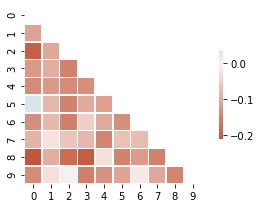

Penn Topic Similarity Matrix


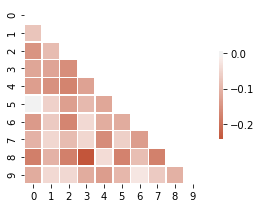

In [107]:
# Correlation plot
#  Adapted from Seaborn docs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from   sklearn.preprocessing import StandardScaler
def show_matrix(sample, title):
    #sns.set_context('talk')
    corr = np.corrcoef(np.array(sample.T))

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(5,3))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(20, 230, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(
        corr,
        mask=mask, 
        cmap=cmap, 
        center=0,
        square=True, 
        linewidths=.5, 
        cbar_kws={"shrink": .5}
    )
    print(title)
    plt.tight_layout()
    plt.show()
show_matrix(ctomo_sample, "Cornell Topic Similarity Matrix")
show_matrix(ptomo_sample, "Penn Topic Similarity Matrix")

In [110]:
def find_topwords(_df, _txtfile):
    with open(_txtfile, 'r') as file:
        alltopics=[]
        lines = file.readlines()
        idx = 3
        while idx < len(lines):
            topic_line = lines[idx]
            words_line = lines[idx+1]
            n = topic_line.split()[1]
            word_1 = words_line.split()[0]
            topic=(f'{topic_line}{words_line}')
            alltopics.append(topic.replace("\n"," "))
            idx += 3
        return alltopics

In [111]:
n_removed = 5
n_topics = 10
modeled=["cornell", "UPenn"]
compiled_df=[]
for school in modeled:
    tomo_folder = os.path.join('output', 'topic_modeling')
    tomo_pklfile = os.path.join(tomo_folder, f'{school}-{n_topics}_{n_removed}.pkl')
    tomo_txtfile = os.path.join(tomo_folder, f'{school}-{n_topics}_{n_removed}.txt')
    tomo_df = pd.read_pickle(tomo_pklfile)
    listwords = find_topwords(tomo_df, tomo_txtfile)
    compiled_df.append(listwords)
df = pd.DataFrame(compiled_df, columns = ["0", "1", "2", "3", "4", "5", "6", "7","8","9"], index=["Cornell","Penn"])
display(df)

,0,1,2,3,4,5,6,7,8,9
Cornell,Topic 0 campus pay would aid year ithaca looking anyone also know live housing one need financial room want money find house student interested plan living place,Topic 1 one good day food dining time around hall also back know campus room really would night could water walk every right eat open got never,Topic 2 covid mask masks vaccinated cases vaccine risk even booster wear still spread students omicron wearing point testing getting would vaccines sick health virus pandemic many,Topic 3 students would think health post doesn one someone also student point even said make many right mental say need saying see university person way could,Topic 4 major take would classes school class year want also course courses engineering math know anyone semester research taking college transfer one gpa credits student need,Topic 5 got back last test email time day know semester week still days would one anyone sure year first covid online weeks class take student didn,Topic 6 class time really think classes much would work good take also lot semester one know feel took pretty course professor well even hard make first,Topic 7 https //www reddit view poll ithaca bus please utm link google app new source anyone syracuse use xNUMb share airport png check nyc auto format,Topic 8 life know feel really friends make one time want even things way good love think someone see would never going something much find everyone social,Topic 9 school students think much college also ithaca lol schools even would years really know got one lot ivy money university many student year big good
Penn,Topic 0 campus city philly live NUMth room around also quad looking one housing area walk house place west hill nice free street near would living roommate,Topic 1 https upenn //www reddit student link google app services please share xNUMb view free find use edu poll email check library website youtube list see,Topic 2 know anyone got would one class email help didn someone think see thanks back time week ask last could haven still also anything said sure,Topic 3 feel really friends even want make time think one know going year much life many lot way things better everyone bad thing never lol say,Topic 4 class good really think lot much time pretty also work great classes would definitely say well probably better might though super things sure hard best,Topic 5 food dining one open use sure also hall room need good buy day used stuff plan back card registration usually make bring NUMpm dollars eat,Topic 6 school students student research college know program would also schools work want experience interested grad pre looking undergrad job med wharton law year upenn high,Topic 7 covid students campus test pass back NUMth week move home break testing vaccinated days day person semester mask going still positive online health masks early,Topic 8 take classes course class major math cis courses taking would semester fall taken also year want econ anyone credit took freshman spring know chem one,Topic 9 school year student aid students degree would financial wharton pay program money NUMk college work need also accepted apply dual application schools transfer years university


## 3. Results

## Part 1: Finding Most Common Words
On a brief analysis, we can see that the top 20 words using CountVectorizer for Penn include the word *friends*, while *friends* doesn't exist in the other schools which means they talk less about that kind of thing. However that being said all colleges had *good* in the top five spots and *work*, which meant it was hard to distinguish between the schools. Another interesting thing was that all the schools had words such as *cs* in the top twenty, indicating that perhaps the actual content or demographic that frequents Reddit is similar across. One thing to note is that Berkeley is the only one that says *hard*, which hints that it could have a lot of negativity or a culture focused on working.

In [53]:
print(topwords)

     Cornell           Columbia              Penn          Berkeley       
        Word   Freq        Word  Freq        Word  Freq        Word   Freq
0    cornell  18310    columbia  6814        penn  4905    berkeley  21838
1       good   7244     student  2549        good  1861          cs  10537
2      covid   5978        good  2357        work  1436        good  10205
3       work   5051        work  2012     student  1403     student   6729
4    student   4681      pretty  1447       upenn  1403        work   6713
5        day   4515  experience  1334     college  1184        math   6138
6        com   4499  university  1315      pretty  1133      pretty   5938
7     pretty   3941     college  1285      better  1036      better   5429
8     ithaca   3834      better  1273        math   971        help   5143
9     better   3814        help  1198         cis   953  experience   4944
10   getting   3768      thanks  1180        help   942     college   4913
11    person   3707     g

However, there are limitations to using top words, for example, we don't know if *friends* being a top word is a good thing - as in people talking about how they have friends, or the latter - a lack of friends. Also, since we are specifically looking for negative sentiment, it's confusing what conclusions to draw because the negative words aren't necessarily in the top words. In fact most words are neutral such as *student* or *work*.

I wanted to do more targetted sentiment analysis and decided to look into statistics on the word counts of specific words. The words I chose to look into were *hard*, *worst*, *sad*, and *hate* for negative words and *fun*, *best*, *happy*, and *love* for happy words. However **before I did that**, I wanted to look at the overall statistics for sentiment data throughout the months to see which schools were the most likely to be different.

## Part 2: Mapping Sentiment Over Time
After measuring the sentiment of each post using VADER and calculating the aggregate over each months - when we look at the different lineplots, we notice some trends:
1. For **positive sentiment** over time we see that Cornell is consistently higher than Penn, indicating that if we directly compared the two we could possibly see statistical significance. Columbia and Berkeley overlap with no clear trend and are mixed together. Generally as time passed, the reddit threads all seemed to become more positive.
2. For the **neutrality** over time, it seemed that as the months gone on, university Reddit threads became more opinionated (neutrality decreases). My hypothesis could be that the end of the year brings out strong emotions in everyone.
3. For **negative sentiment** over time there were less clear trends - all the lines ended up overlapping besides Penn and Cornell. As a result it seemed like all universities seemed to complain an equal amount.
4. In terms of **overall sentiment**, when looking at the **scales (y-axis)** it generally seemed that university Reddits liked to complain more than say positive things.

#### Does weather affect mood?
Because this was part of my original research question, I wanted to see if weather still played a factor. When we took a look at it, I realized that although positivity seemed to increase as the months went on into spring, negativity didn't spike at the predicted period of the fall and winter and instead seemed to fluctuate up and down. As a result, it wasn't clear if that was one of the factors that affected school happiness.
#### Did the pandemic affect mood?
As mentioned before, it seemed that positivity over time seemed to net increase, which is a sign that as schools adjusted their policies to the pandemic and people trusted their schools more, student mood became a lot better.

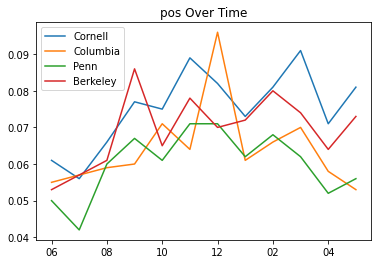

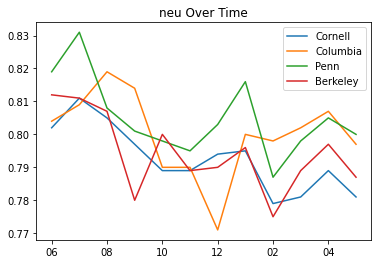

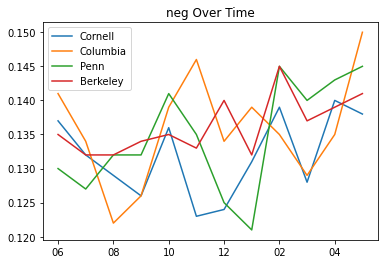

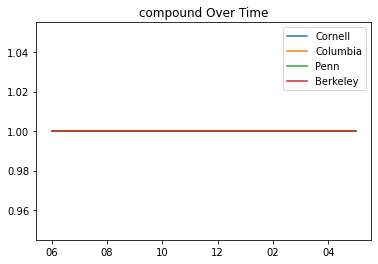

In [ ]:
lines = linegraph.plot.line(title=(measure+" Over Time"))

## Part 3: Statistical Significance in Positive or Negative Words
Now knowing what trends to look for, I decided to do a general ANOVA test on all four universities at once and T-test on Penna and Cornell. This way I'd be able to see, when grouped into the different months, if data was consistently negative or positive. 

I chose to do it on signal words that indicated negative or positivity to improve processing time and also avoid any semantic nuance. First though, I needed to find the yearly average frequency for each of the signal words.

### Looking at the Word Count Frequencies per School
These tables display the word counts for each school when normalized to a typical 100 word post over the data set of a whole year and will serve as a reference when looking at statistical test results. The number can be interpreted as how often it appears per 100 words. On first glance it seems that Cornell says *hard* the least and *sad* the most which provides conflicting information on whether it is overall the most depressing.For happy words Cornell says *fun* and *best* and isn't the top for the other two words, indicating that it isn't the most happy school either.
#### Negative Word Frequency Table

In [81]:
display(neg_wordfreq)

Cornell           Columbia             Penn           Berkeley          
     Word      Freq     Word      Freq   Word      Freq     Word      Freq
0    hard  2.912652     hard  3.972954   hard  3.711769     hard  4.051291
1   worst  0.573084    worst  0.748180  worst  0.561363    worst  0.580703
2     sad  0.516405      sad  0.376090    sad  0.246806      sad  0.476195
3    hate  0.756765     hate  0.576138   hate  0.677507     hate  0.760639

#### Positive Word Frequency Table

In [84]:
display(happy_wordfreq)

Cornell           Columbia             Penn           Berkeley          
     Word      Freq     Word      Freq   Word      Freq     Word      Freq
0     fun  1.403321      fun  1.444347    fun  1.645374      fun  1.784822
1    best  3.090035     best  4.044971   best  3.827913     best  3.897709
2   happy  0.965636    happy  1.072257  happy  1.282424    happy  0.944211
3    love  2.144342     love  2.588621   love  1.790554     love  2.309181

### ANOVA Test Results
An ANOVA test was necessary to understand the differences between all four universities at once and determine how seriously we should take the frequency differences for each word. 

One interesting thing to note is that we do see statistical significance for the word **sad**, as the p-value was less than 5%. That means Cornell indeed had the most amount of posts that had the word sad in it when compared to the others which could be a sign of higher rates of sadness.

However this leads to interesting conflicting information - if we go back to the graph and take a look, that means as a whole Cornell tends to lean on the less negative side for all the universities, and negativity peaks in October (which could be due to recruiting and midterms) and the end of spring, which could be due to rising COVID cases and finals. Since the context words are said also matter a lot, it was necessary for me to do a topic model analysis later to understand how to unpack this conflicting information.
#### Negative ANOVA Results and Original Frequency Table

In [112]:
print_anova(sad_final, sad_words)
display(neg_wordfreq)


hard:
Anova-Statistic: 1.6575862002348383
p-value:     0.1899295724068869

worst:
Anova-Statistic: 0.9478638506265843
p-value:     0.42575399295873595

sad:
Anova-Statistic: 3.189617285069839
p-value:     0.032745467757636

hate:
Anova-Statistic: 0.4598508523755862
p-value:     0.7117300365546289


Cornell           Columbia             Penn           Berkeley          
     Word      Freq     Word      Freq   Word      Freq     Word      Freq
0    hard  2.912652     hard  3.972954   hard  3.711769     hard  4.051291
1   worst  0.573084    worst  0.748180  worst  0.561363    worst  0.580703
2     sad  0.516405      sad  0.376090    sad  0.246806      sad  0.476195
3    hate  0.756765     hate  0.576138   hate  0.677507     hate  0.760639

If we look at the positive ANOVA statistics we don't see any statistically significant p-values for any word (the p-value is over 5%), which could indicate that when comparing all four universities at once they don't differ as much in positivity. That being said, there does seem to be the lowest p-value of 12.4% with **love**, so that could be an indication of a stratification of universities that particularly feel school spirit or romance. As a result it seems that Penn is low on **love** (it is the lowest one on the frequency table) which may explain it's general low positivity rates on the graph.
#### Positive ANOVA Results and Original Frequency Table

In [114]:
print_anova(happy_final, happy_words)
display(happy_wordfreq)


fun:
Anova-Statistic: 1.3050520200570228
p-value:     0.28475066395104026

best:
Anova-Statistic: 1.239463465695371
p-value:     0.30683456755407

happy:
Anova-Statistic: 1.322226030587472
p-value:     0.2792230409962136

love:
Anova-Statistic: 2.0223837038425905
p-value:     0.12458887596196697


Cornell           Columbia             Penn           Berkeley          
     Word      Freq     Word      Freq   Word      Freq     Word      Freq
0     fun  1.403321      fun  1.444347    fun  1.645374      fun  1.784822
1    best  3.090035     best  4.044971   best  3.827913     best  3.897709
2   happy  0.965636    happy  1.072257  happy  1.282424    happy  0.944211
3    love  2.144342     love  2.588621   love  1.790554     love  2.309181

### T-test Test Results
Next we're going to look at a t-test comparing two different schools specifically. I wanted to do a t-test between the two schools that showed a consistent difference throughout the months, which was Cornell and Penn as seen on the positivity line graph.
As we look at the positive t test, we don't see any patterns of statistical significant between any of the values, although the p-values are generally lower than the ANOVA p values. Perhaps we see a difference in the significance of **happy** (16.7%), but that's not enough to make any judgements. If we ignored the p-values though, that means Penn has been consistently happier than Cornell in terms of those term counts, but that contradicts the results from the sentiment line graphs, which may explain the **lack of significance in the t-test throughout**.
#### Positive T-test Results and Original Frequency Table

In [117]:
find_t(happy_final, happy_words)
display(happy_wordfreq.drop(["Columbia","Berkeley"], axis=1))


fun:
T-test: -1.0838748511826684
p-value:     0.29282112713955905

best:
T-test: -1.373472710879281
p-value:     0.18762548886853364

happy:
T-test: -1.4411504399136754
p-value:     0.1670461026094374

love:
T-test: 1.1341573308917197
p-value:     0.26920172287084476


Cornell             Penn          
     Word      Freq   Word      Freq
0     fun  1.403321    fun  1.645374
1    best  3.090035   best  3.827913
2   happy  0.965636  happy  1.282424
3    love  2.144342   love  1.790554

However when we look at the different t-tests that compare sadness, we see a striking result. For the word **sad** there is heavy statistical significance, as a result, it leads me to believe that Cornell is significantly sadder than Penn or Cornell students express their sadness more, even when looking otherwise at the Reddit as a whole. However, the second lowest p-value is with the word **hard** (18%), thus indicating it could be possible that Penn has more people expressing it's hard. 
#### Negative T-test Results and Original Frequency Table

In [118]:
find_t(sad_final, sad_words)
display(neg_wordfreq.drop(["Columbia","Berkeley"], axis=1))


hard:
T-test: -1.395795430584186
p-value:     0.18040776903842454

worst:
T-test: 0.08689317074644742
p-value:     0.9318467153161764

sad:
T-test: 3.8079087038982715
p-value:     0.0010912620086626738

hate:
T-test: 0.4008689868794818
p-value:     0.6923852975894367


Cornell             Penn          
     Word      Freq   Word      Freq
0    hard  2.912652   hard  3.711769
1   worst  0.573084  worst  0.561363
2     sad  0.516405    sad  0.246806
3    hate  0.756765   hate  0.677507

## Part 4: Qualitatively Examining Different Holistic Topic Models
As seen above, there seems to be conflicting information from the VADER analysis and the frequency statistical tests. Ultimately in the end, to give one last dimension to the overarching question of whether Cornell was the most negative and what unique factors lead to it - I decided to use topic modeling to see possible similarities and differences in what people were actually talking about in the Reddits. I used LDA topic modeling from the tomotopy package and applied a heat map to the document matrix.

Cornell Topic Similarity Matrix


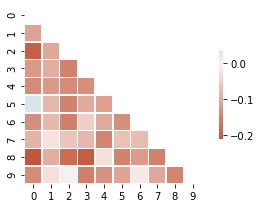

Penn Topic Similarity Matrix


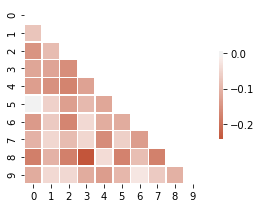

In [109]:
show_matrix(ctomo_sample, "Cornell Topic Similarity Matrix")
show_matrix(ptomo_sample, "Penn Topic Similarity Matrix")

The heatmap matrix shows how likely it is that certain topics occur together, with the lighter bluer tint making it more likely and the darker red color meaning it's less. The distribution between the two universities was similar, meaning that students tend to post focusing only on one topic at a time. 

I wanted to look closely at topics **5 and 0** for Cornell and Penn because that was the lightest color (meaning they could occur together). I also wanted to look at topics **9 and 2** for Cornell because that was the second lightest with a blue tint.

I also wanted to look at what people were definitely not talking about together which was **8 and 0** for Cornell and **8 and 3** for Penn.

In [119]:
display(df)

,0,1,2,3,4,5,6,7,8,9
Cornell,Topic 0 campus pay would aid year ithaca looking anyone also know live housing one need financial room want money find house student interested plan living place,Topic 1 one good day food dining time around hall also back know campus room really would night could water walk every right eat open got never,Topic 2 covid mask masks vaccinated cases vaccine risk even booster wear still spread students omicron wearing point testing getting would vaccines sick health virus pandemic many,Topic 3 students would think health post doesn one someone also student point even said make many right mental say need saying see university person way could,Topic 4 major take would classes school class year want also course courses engineering math know anyone semester research taking college transfer one gpa credits student need,Topic 5 got back last test email time day know semester week still days would one anyone sure year first covid online weeks class take student didn,Topic 6 class time really think classes much would work good take also lot semester one know feel took pretty course professor well even hard make first,Topic 7 https //www reddit view poll ithaca bus please utm link google app new source anyone syracuse use xNUMb share airport png check nyc auto format,Topic 8 life know feel really friends make one time want even things way good love think someone see would never going something much find everyone social,Topic 9 school students think much college also ithaca lol schools even would years really know got one lot ivy money university many student year big good
Penn,Topic 0 campus city philly live NUMth room around also quad looking one housing area walk house place west hill nice free street near would living roommate,Topic 1 https upenn //www reddit student link google app services please share xNUMb view free find use edu poll email check library website youtube list see,Topic 2 know anyone got would one class email help didn someone think see thanks back time week ask last could haven still also anything said sure,Topic 3 feel really friends even want make time think one know going year much life many lot way things better everyone bad thing never lol say,Topic 4 class good really think lot much time pretty also work great classes would definitely say well probably better might though super things sure hard best,Topic 5 food dining one open use sure also hall room need good buy day used stuff plan back card registration usually make bring NUMpm dollars eat,Topic 6 school students student research college know program would also schools work want experience interested grad pre looking undergrad job med wharton law year upenn high,Topic 7 covid students campus test pass back NUMth week move home break testing vaccinated days day person semester mask going still positive online health masks early,Topic 8 take classes course class major math cis courses taking would semester fall taken also year want econ anyone credit took freshman spring know chem one,Topic 9 school year student aid students degree would financial wharton pay program money NUMk college work need also accepted apply dual application schools transfer years university


As you can see above, the topics that occur together for Cornell - 5 is about Covid logistics and 0 is about campus housing logistics. For Penn we see a different yet similar result, with the 0 topic being about housing and the 5 being about food, both are advice seeking general logistical questions. When we look at 9 and 2 for Cornell we see that comments about the university's COVID policies and its general large size and financial status being another pair that co-occurs, which is a unique feature of Cornell compared to Penn that could be taken into account for fluctuations in data as to a possible reason for the differences.

When looking at topics that didn't occur together, it looks like Cornellians don't talk about the struggle to make friends and looking for housing at the same time, meaning that struggling to make friends is a very specific rant post people make often. For Penn it seems that people will never talk about what courses people are taking next semester and their process of making friends, showing that Penn students similarly have specialized posts that are divided between logistical concerns and rant posts about personal social matters.

As a whole we see that the topics between Penn and Cornell, qualitatively, are the same as they both ask for advice on general campus things such as food and housing, worry about COVID, and ask for help on making friends. They're even similar in terms of what topics occur together as well, which means that there isn't a huge difference between the two.

However one greater difference is that Cornell's topic 3 specifically targets mental health and that is absent in Penn whilst Penn's topic 6 about preprofessional advice (in regards to job seeking and work) is no where to be seen in Cornell. It could show that in general, students care more about mental health resources at Cornell while Penn students focus more on preprofessional ventures. Perhaps it is a good sign that sad appears more on Cornell posts because that could be a sign students are self-aware and taking an active step to preventing it. As a result, the higher occurrance of the word "sad" could really mean students are taking more effort to express their emotions and seek help. It's a sign that further investigation is needed before using any of these results as the definitive truth. Especially because I was looking at isolated words, it is a huge question whether these words are enough without context to generalize to how the student body is feeling as a whole.

## 4. Discussion and conclusions

As discussed in my results, I did not clearcut results for any of my questions. In a more organized manner, here are each one of my hypothesis and whether or not they were supported:

1. When looking at frequency and content of Reddit posts, Cornell’s positivity and negativity of its student is not statistically different from other universities.

This is partly true - for most of the indicator words there was no statistically significant difference. However for the word *sad* it was statistically significant that Cornell's was the most. Additionally for the happy words, Cornell's frequency was not the highest even though there was no statistical significance. That being said, when looking at the line graph as a whole Cornell's was positivity sentiment was always higher than Penn's and in the negative line graph Cornell was never the highest. This could point out a limitation in the four words I chose to represent positivity and negativity and VADER may be a better indication of the general sentiment. That being said if I had more time I would have to do a statistical test with VADER. Even if Cornell was sadder, in the topic models there wasn't a topic that was all depressing information, in fact the only unique topic model Cornell had dealt with addressing mental health which is a good thing. Overall, at any high pressure school students face similar problems so logically it makes sense that Cornell was not definitively statistically significantly sadder.

2. For all universities with discernable seasons, well-being took a dip in the winter time - for reasons such as [seasonable depression](https://health.cornell.edu/sites/health/files/pdf-library/winter-blues.pdf)

This was not supported - when we look at the trends of months over time in the line graph, we see that negative sentiment decreases October to January but increases from February to March, thus making it difficult to generalize phenomenon happening. This could mean there are other factors beyond weather such as COVID spikes and finals that cause stressors. Because a lot of CS majors frequent these Reddits, it could be that mental health is much more affected by factors like tests and recruiting than anything else.

3. For months early in the pandemic (September, October 2021) there would more negativity than months later in the spring (April, May 2022).

This was partially supported - because the negative charts seem to fluctuate the most, we look at the positive line chart for trends. Generally you can see positivity increase as time goes on, suggesting that this hypothesis may be true as schools move back to in-person. However if you look at the scale, positivity as a whole still doesn't increase a lot. Although I didn't have time, to further test this hypothesis I would have counted how often the word COVID appears in each month to see if it ends up decreasing as time goes on, providing a even more direct indication this hypothesis is true. It would've been stronger also if negativity decreased, but negativity is impacted by many factors and its possible this is not a large enough one to make a difference.

One of the major limitations of my study was the capabilities of my computer to process large amounts of data. Originally I had 250,000 posts and comments from a years worth of data from four Reddits. However because my computer would overheat while processing and processing even a thousand lines would take ten minutes, I knew I had to reduce the size and randomly sampled one fifth of the set. That being said it still took 3-4 hours to process all the data. 

Because of this limitation, that could mean the final results are less accurate. It also means it's more difficult to do cross-cutting work across longer periods of time. In the future I'd try to bypass these limitations by parallelizing the processing required by asking others to run the data on their computers at the same time and then pickling. I could also cross-compare less and focus more on the length of time, therefore still having the same amount of data. Also if I had more time I would do more statistical tests on smaller groupings, which would have taken more time to process but also provide better basis for significance.

Another limitation was my own abilities and time - because I had other finals going on at the same time it was difficult to cover all the edge cases and do everything I wanted to do. I also took a lot of time to debug and sometime it ended up being simple fixes that took much longer than anticipated. If I had all the time in the world, I would work on the expansions I listed previously. 

Also, my sentiment model VADER only rates overall positive or negative feelings, it's harder to pinpoint what is causing them although we were able to extrapolate from the topic models. Additionally because with larger datasets the compound value becomes 1, I would definitely see this as a limitation with the nuance of the model. As a result, I would try and do more complex data models such as hugging face to try and target more nuanced emotions. 

All in all, I find my hypothesis' to be partially supported, yet incomplete. There are many more ways to analyze data to provide more definitive clues towards the truth. However I also notice fault in my hypothesis themselves - student's emotions are complex and can be impacted by many factors making it difficult to isolate the root cause for feeling. Either way, it's good to know that Cornell is definitively not the most depressing nor the most positive school.

### References
#### Preface
- https://thetab.com/us/2017/03/10/stressful-college-america-62478
- https://cornellsun.com/2022/04/20/cornellians-reflect-on-the-pressures-of-college-life-as-another-academic-year-comes-to-a-close%EF%BF%BC/
- https://www.salon.com/2021/12/19/depression-universities/
- https://health.cornell.edu/sites/health/files/pdf-library/winter-blues.pdf
- https://www.insidehighered.com/news/2022/03/22/cornell-engineering-cuts-credit-limit-save-mental-health
- https://sidechat.lol

#### Coding
- https://www.analyticsvidhya.com/blog/2021/06/part-18-step-by-step-guide-to-master-nlp-topic-modelling-using-lda-probabilistic-approach/
- https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/04-Sentiment-Analysis.html#how-vader-was-built-and-how-it-works
- All documentation on Pandas and other statistic packages
- Lectures on social media scraping, topic modeling, and previous pset on statistics for inspiration, however I had to make several adjustments to fit my data and research aim and spent a decent amount of time debugging my own function and flows
- Stack overflow on pickling and reading JSON and txt files as well as general data processing [example](https://stackoverflow.com/questions/44287011/valueerror-expected-object-or-value-when-reading-json-as-pandas-dataframe)
- https://www.investopedia.com/terms/a/anova.asp
- tomotopy documentation: https://bab2min.github.io/tomotopy/v0.12.2/en/#tomotopy.LDAModel
- https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/topic-modeling-naive.html
- Google Colab when my computer could not handle VADER processing.
- https://methods.sagepub.com/reference/encyc-of-research-design/n340.xml